<a href="https://colab.research.google.com/github/Fireflash135/samples/blob/main/NLP_Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>NLP Project

## <center>Group 1

### **<center>Assess the sentiments of Meta (Facebook) on 2 dates: one before the crash of Meta Stock, and one after the crash of Meta stock. Also assess the sentiments of one of its main rivals, TikTok**



1.   Anmol BHOJ - 66850
2.   Abdelaziz EL MOKRI - 59465
3.   Hugo CAILLOL - 59414
4. Imane ESSADIQ - 62529
5. Laura KÖNIG - 57453
6. Mathieu MARCHAND - 62677
7. Taha BAZIZ - 54588



# Setup

In [ ]:
# pip installs of required packages
!pip install snscrape
!pip install beautifulsoup4
!pip install tweepy
!pip install emoji
!pip install vaderSentiment textblob

In [ ]:
# imports
import json
import os
import requests
import zipfile
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from pprint import pprint
import gensim
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from os.path import expanduser
import gensim.corpora as corpora
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfTransformer
import textblob
from sklearn.metrics.pairwise import cosine_similarity
% matplotlib inline
import bs4
import emoji
import warnings
warnings.filterwarnings('ignore')
import tweepy
from google.colab import files
import snscrape.modules.twitter as sntwitter
import itertools
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
# Downloading nltk addons
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Scraping the Tweets

Below is an extract of one set of codes used to scrape tweets for one specific date. The same set of codes were applied to scrape tweets of both Meta and its competitors for 2 dates: 31-Jan-2022 and 02-Feb-2022

In [ ]:
# our search term, using syntax for Twitter's Advanced Search
criteria = '"tiktok" + lang:en + since:2022-01-22 + until:2022-01-23'

# the scraped tweets, this is a generator
scraped_tweets = sntwitter.TwitterSearchScraper(criteria).get_items()

# slicing the generator to keep only the first X number of tweets
sliced_scraped_tweets = itertools.islice(scraped_tweets, None)

# convert to a DataFrame and keep only relevant columns
df_test = pd.DataFrame(sliced_scraped_tweets)[['date', 'content']]

df_test.to_csv('Tiktok_22_1_22.csv')
files.download('Tiktok_22_1_22.csv') 

# Loading the Tweets

### Meta

In [ ]:
# Load the tweets before the fall of stock
meta_before = pd.read_csv("/content/Meta_22_01_31.csv", parse_dates=['date'], index_col=0)

# Load the first set of tweets after the fall of stock
meta_after_1 = pd.read_csv("/content/Meta_22_02_02.csv", parse_dates=['date'], index_col=0)

# Load the second set of tweets after the fall of stock
#meta_after_2 = pd.read_csv("/content/Meta_22_02_03.csv", parse_dates=['date'], index_col=0)

In [ ]:
# Print the head of Meta tweets before crash
print(meta_before.shape)
meta_before.head()

(39739, 2)


,date,content
0,2022-01-31 23:59:59+00:00,@pistachioalt First they meta their way in the...
1,2022-01-31 23:59:59+00:00,Meta Shiba Token Review\nMeta Shiba started 20...
2,2022-01-31 23:59:49+00:00,@bethchase Funny story: I used that last name ...
3,2022-01-31 23:59:49+00:00,@META_Shiba The shib is great but what if we w...
4,2022-01-31 23:59:48+00:00,Zeekiedude streaming: Yu-Gi-Oh Master Duel Vir...


In [ ]:
# Print the head of Meta tweets after crash 
print(meta_after_1.shape)
meta_after_1.head()

(49456, 2)


,date,content
0,2022-02-02 23:59:59+00:00,Meta estimates Apple's iOS changes will cost i...
1,2022-02-02 23:59:58+00:00,This George Brett Limited from 2019 just moved...
2,2022-02-02 23:59:57+00:00,@disclosetv my teens have never used facebook....
3,2022-02-02 23:59:57+00:00,@notallwitches buffing an infinite scaler in a...
4,2022-02-02 23:59:56+00:00,Are the days of meta running out? https://t.co...


In [ ]:
# Total number of Meta tweets
meta_total = meta_before.shape[0] + meta_after_1.shape[0]
print("Total number of Meta tweets: %s" % meta_total)

Total number of Meta tweets: 89195


### Competitors

In [ ]:
# Load the tweets before the fall of stock
tk_before = pd.read_csv("/content/Tiktok_31_1_22.csv", parse_dates=['date'], index_col=0)

# Load the first set of tweets after the fall of stock
tk_after_1 = pd.read_csv("/content/Tiktok_02_2_22.csv", parse_dates=['date'], index_col=0)

# Load the second set of tweets after the fall of stock
#tk_after_2 = pd.read_csv("/content/Tiktok_03_2_22.csv", parse_dates=['date'], index_col=0)

In [ ]:
# Print the head of TikTok tweets before crash
print(tk_before.shape)
tk_before.head()

(49668, 2)


,date,content
0,2022-01-31 23:59:58+00:00,oh yeah tesla well what about a car that just ...
1,2022-01-31 23:59:56+00:00,bro look at the date of the tiktok 😐 https://t...
2,2022-01-31 23:59:54+00:00,"I go on tiktok for the bad b*tches, not to hea..."
3,2022-01-31 23:59:52+00:00,Check out Jack's video! #TikTok https://t.co/c...
4,2022-01-31 23:59:51+00:00,Just saw a Nigerian girl’s engagement photos o...


In [ ]:
# Print the head of TikTok tweets after crash
print(tk_after_1.shape)
tk_after_1.head()

(49266, 2)


,date,content
0,2022-02-02 23:59:58+00:00,gronks tiktok ab tom brady retiring made me em...
1,2022-02-02 23:59:57+00:00,Check out Samuel Lopez's video! #TikTok https:...
2,2022-02-02 23:59:57+00:00,@haileybenson22 We 👀 you! Post your BEST play ...
3,2022-02-02 23:59:57+00:00,@JessJessieyyy @esports The communities are di...
4,2022-02-02 23:59:54+00:00,OWEN POSTED A TIKTOK FINALLY… it’s ab that man...


In [ ]:
# Total number of TikTok tweets
tk_total = tk_before.shape[0] + tk_after_1.shape[0]
print("Total number of TikTok tweets: %s" % tk_total)

Total number of TikTok tweets: 98934


### Tweet Counts

In [ ]:
# Store the counts as a list
meta_count = [meta_before.shape[0], meta_after_1.shape[0]]
tk_count = [tk_before.shape[0], tk_after_1.shape[0]]
index = ['Meta', 'TikTok']

# Print the counts as a DataFrame
tweet_count = pd.DataFrame(data=[meta_count, tk_count], columns=['before crash (31-Jan-2022)', 'after crash (02-Feb-2022)'], index=index)
tweet_count['Total'] = tweet_count.sum(axis=1)
tweet_count

,before crash (31-Jan-2022),after crash (02-Feb-2022),Total
Meta,39739,49456,89195
TikTok,49668,49266,98934


In [ ]:
# Print total tweet count of both Meta and TikTok
total_tweet_count = np.sum(tweet_count['Total'], axis=0)
print("Total Tweet count of both Meta and TikTok: %s" % total_tweet_count)

Total Tweet count of both Meta and TikTok: 188129


# Preprocessing - Cleaning


In [ ]:
def cleaner(tweets):
# Lowercase the text
  tweets = tweets.lower()

# Remove http links
  tweets = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweets) 

# Remove punctuations
  tweets = re.sub(r'[^\w+]', " ", tweets) 

# Remove emojis
  tweets = " ".join(tweets.split())
  tweets = ''.join(c for c in tweets if c not in emoji.UNICODE_EMOJI) 

# Remove hashtag sign but keep the text
  tweets = tweets.replace("#", "").replace("_", " ") 

# Further remove any non-english words
  tweets = " ".join(w for w in nltk.wordpunct_tokenize(tweets) \
          if w.lower() in words or not w.isalpha())
  return tweets

In [ ]:
# Defining the POS function for wordnet lemmatizing
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    pos = ''
    if word.startswith('J'):
      pos = wordnet.ADJ
      return pos
    elif word.startswith('V'):
      pos = wordnet.VERB
      return pos
    elif word.startswith('N'):
      pos = wordnet.NOUN
      return pos
    elif word.startswith('R'):
      pos = wordnet.ADV
      return pos
    else:
      pos = wordnet.NOUN
      return pos
    
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, pos)

In [ ]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Load the stop words
stop_words = stopwords.words('english')

# Define the lemmatizer function
def lemma_function(cleaned_tweet):

  # Tokenizing the text while removing the stop words
  cleaned_token = word_tokenize(cleaned_tweet)

  keywords = [word for word in cleaned_token if not word in stop_words]

  # Applying the lemmatizing function to keywords
  lemmatized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in keywords]

  # Rejoining the lemmatized words into one single string
  lemmatized = ' '.join(lemmatized)

  return lemmatized

## Meta - Before Stock crash (31-Jan-2022)

In [ ]:
# Clean the individual tweets in the document
meta_before['cleaned'] = meta_before['content'].apply(lambda x : cleaner(x))
meta_before.head()

,date,content,cleaned
0,2022-01-31 23:59:59+00:00,@pistachioalt First they meta their way in the...,first they meta their way in the casino in the...
1,2022-01-31 23:59:59+00:00,Meta Shiba Token Review\nMeta Shiba started 20...,meta token review meta 2021 11 08 and it s cur...
2,2022-01-31 23:59:49+00:00,@bethchase Funny story: I used that last name ...,funny story i used that last name on for
3,2022-01-31 23:59:49+00:00,@META_Shiba The shib is great but what if we w...,the is great but what if we were more meta
4,2022-01-31 23:59:48+00:00,Zeekiedude streaming: Yu-Gi-Oh Master Duel Vir...,streaming oh master duel virtual world meta deck


In [ ]:
# Create string that will contain all tweets in single string for wordcloud, corpus matrix... 
# ... and tf-idf based cosine similarity
meta_before_text = ' '.join(meta_before["content"].astype('str'))
len(meta_before_text)

6105266

In [ ]:
# Clean the entire document
meta_before_clean = cleaner(meta_before_text)
len(meta_before_clean)

3464553

In [ ]:
# Lemmatize the individual tweets in the document
meta_before['lemmatized'] = meta_before['cleaned'].apply(lambda x : lemma_function(x))
meta_before.head()

,date,content,cleaned,lemmatized
0,2022-01-31 23:59:59+00:00,@pistachioalt First they meta their way in the...,first they meta their way in the casino in the...,first meta way casino day x figured second fin...
1,2022-01-31 23:59:59+00:00,Meta Shiba Token Review\nMeta Shiba started 20...,meta token review meta 2021 11 08 and it s cur...,meta token review meta 2021 11 08 currently ac...
2,2022-01-31 23:59:49+00:00,@bethchase Funny story: I used that last name ...,funny story i used that last name on for,funny story used last name
3,2022-01-31 23:59:49+00:00,@META_Shiba The shib is great but what if we w...,the is great but what if we were more meta,great meta
4,2022-01-31 23:59:48+00:00,Zeekiedude streaming: Yu-Gi-Oh Master Duel Vir...,streaming oh master duel virtual world meta deck,streaming oh master duel virtual world meta deck


In [ ]:
# Lemmatize the entire document
meta_before_lema = lemma_function(meta_before_clean)

## Meta - After Stock Crash (02-Feb-2022)

In [ ]:
# Clean the individual tweets in the document
meta_after_1['cleaned'] = meta_after_1['content'].apply(lambda x : cleaner(x))
meta_before.head()

,date,content,cleaned,lemmatized
0,2022-01-31 23:59:59+00:00,@pistachioalt First they meta their way in the...,first they meta their way in the casino in the...,first meta way casino day x figured second fin...
1,2022-01-31 23:59:59+00:00,Meta Shiba Token Review\nMeta Shiba started 20...,meta token review meta 2021 11 08 and it s cur...,meta token review meta 2021 11 08 currently ac...
2,2022-01-31 23:59:49+00:00,@bethchase Funny story: I used that last name ...,funny story i used that last name on for,funny story used last name
3,2022-01-31 23:59:49+00:00,@META_Shiba The shib is great but what if we w...,the is great but what if we were more meta,great meta
4,2022-01-31 23:59:48+00:00,Zeekiedude streaming: Yu-Gi-Oh Master Duel Vir...,streaming oh master duel virtual world meta deck,streaming oh master duel virtual world meta deck


In [ ]:
# Create string that will contain all tweets in single string for wordcloud, corpus matrix... 
# ... and tf-idf based cosine similarity
meta_after_text = ' '.join(meta_after_1["content"].astype('str'))
len(meta_after_text)

7503814

In [ ]:
# Clean the entire document
meta_after_clean = cleaner(meta_after_text)
len(meta_after_clean)

4189593

In [ ]:
# Lemmatize the individual tweets in the document
meta_after_1['lemmatized'] = meta_after_1['cleaned'].apply(lambda x : lemma_function(x))
meta_after_1.head()

,date,content,cleaned,lemmatized
0,2022-02-02 23:59:59+00:00,Meta estimates Apple's iOS changes will cost i...,meta apple s will cost it 10b in 2022 by via,meta apple cost 10b 2022 via
1,2022-02-02 23:59:58+00:00,This George Brett Limited from 2019 just moved...,this brett limited from 2019 just for 300 only...,brett limited 2019 300 5 available everyone ge...
2,2022-02-02 23:59:57+00:00,@disclosetv my teens have never used facebook....,my teens have never used if the think it s dum...,teen never used think dumb day
3,2022-02-02 23:59:57+00:00,@notallwitches buffing an infinite scaler in a...,buffing an infinite scaler in a scaling meta i...,buffing infinite scaler scaling meta cant breathe
4,2022-02-02 23:59:56+00:00,Are the days of meta running out? https://t.co...,are the days of meta running out,day meta running


In [ ]:
# Lemmatize the entire document
meta_after_lema = lemma_function(meta_after_clean)

## TikTok - Before Meta's crash (31-Jan-2022)

In [ ]:
# Clean the individual tweets in the document
tk_before['cleaned'] = tk_before['content'].apply(lambda x : cleaner(x))
tk_before.head()

,date,content,cleaned
0,2022-01-31 23:59:58+00:00,oh yeah tesla well what about a car that just ...,oh yeah well what about a car that just into y...
1,2022-01-31 23:59:56+00:00,bro look at the date of the tiktok 😐 https://t...,look at the date of the
2,2022-01-31 23:59:54+00:00,"I go on tiktok for the bad b*tches, not to hea...",i go on for the bad b not to hear all these i m
3,2022-01-31 23:59:52+00:00,Check out Jack's video! #TikTok https://t.co/c...,check out jack s video
4,2022-01-31 23:59:51+00:00,Just saw a Nigerian girl’s engagement photos o...,just saw a girl s engagement on and her man is...


In [ ]:
# Create string that will contain all tweets in single string for wordcloud, corpus matrix... 
# ... and tf-idf based cosine similarity
tk_before_text = ' '.join(tk_before["content"].astype('str'))
len(tk_before_text)

5543966

In [ ]:
# Clean the entire document
tk_before_clean = cleaner(tk_before_text)
len(tk_before_clean)

3117158

In [ ]:
# Lemmatize the individual tweets in the document
tk_before['lemmatized'] = tk_before['cleaned'].apply(lambda x : lemma_function(x))
tk_before.head()

,date,content,cleaned,lemmatized
0,2022-01-31 23:59:58+00:00,oh yeah tesla well what about a car that just ...,oh yeah well what about a car that just into y...,oh yeah well car
1,2022-01-31 23:59:56+00:00,bro look at the date of the tiktok 😐 https://t...,look at the date of the,look date
2,2022-01-31 23:59:54+00:00,"I go on tiktok for the bad b*tches, not to hea...",i go on for the bad b not to hear all these i m,go bad b hear
3,2022-01-31 23:59:52+00:00,Check out Jack's video! #TikTok https://t.co/c...,check out jack s video,check jack video
4,2022-01-31 23:59:51+00:00,Just saw a Nigerian girl’s engagement photos o...,just saw a girl s engagement on and her man is...,saw girl engagement man stunning


In [ ]:
# Lemmatize the entire document
tk_before_lema = lemma_function(tk_before_clean)

## TikTok - After Meta's crash (02-Feb-2022)

In [ ]:
# Clean the individual tweets in the document
tk_after_1['cleaned'] = tk_after_1['content'].apply(lambda x : cleaner(x))
tk_after_1.head()

,date,content,cleaned
0,2022-02-02 23:59:58+00:00,gronks tiktok ab tom brady retiring made me em...,retiring made me emotional
1,2022-02-02 23:59:57+00:00,Check out Samuel Lopez's video! #TikTok https:...,check out s video
2,2022-02-02 23:59:57+00:00,@haileybenson22 We 👀 you! Post your BEST play ...,we you post your best play on our so more coll...
3,2022-02-02 23:59:57+00:00,@JessJessieyyy @esports The communities are di...,the are different and a and more powerful posi...
4,2022-02-02 23:59:54+00:00,OWEN POSTED A TIKTOK FINALLY… it’s ab that man...,posted a finally it s that man but still


In [ ]:
# Create string that will contain all tweets in single string for wordcloud, corpus matrix... 
# ... and tf-idf based cosine similarity
tk_after_text = ' '.join(tk_after_1["content"].astype('str'))
len(tk_after_text)

5389413

In [ ]:
# Clean the entire document
tk_after_clean = cleaner(tk_after_text)
len(tk_after_clean)

3009031

In [ ]:
# Lemmatize the individual tweets in the document
tk_after_1['lemmatized'] = tk_after_1['cleaned'].apply(lambda x : lemma_function(x))
tk_after_1.head()

,date,content,cleaned,lemmatized
0,2022-02-02 23:59:58+00:00,gronks tiktok ab tom brady retiring made me em...,retiring made me emotional,retiring made emotional
1,2022-02-02 23:59:57+00:00,Check out Samuel Lopez's video! #TikTok https:...,check out s video,check video
2,2022-02-02 23:59:57+00:00,@haileybenson22 We 👀 you! Post your BEST play ...,we you post your best play on our so more coll...,post best play college watch ball play could f...
3,2022-02-02 23:59:57+00:00,@JessJessieyyy @esports The communities are di...,the are different and a and more powerful posi...,different powerful position u twitch people gi...
4,2022-02-02 23:59:54+00:00,OWEN POSTED A TIKTOK FINALLY… it’s ab that man...,posted a finally it s that man but still,posted finally man still


In [ ]:
# Lemmatize the entire document
tk_after_lema = lemma_function(tk_after_clean)

# General Analysis

## WordClouds

In [ ]:
# Drawing the wordcloud based on frequency of words

# Calling the cloud-shaped mask
mask = np.array(Image.open('/content/idWA0R3O_4x.jpeg')) ## Loaded from a file uploaded to runtime. 
                                                          ## Image can be downloaded from: https://imgur.com/a/F15yjwi

# Initializing the wordcloud function
meta_before_wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], collocations=False)

meta_after_wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], collocations=False)

tk_before_wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], collocations=False)

tk_after_wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], collocations=False)

In [ ]:
# Generating the wordcloud from our lemmatized text
meta_before_wc.generate_from_text(meta_before_lema)
meta_after_wc.generate_from_text(meta_after_lema)
tk_before_wc.generate_from_text(tk_before_lema)
tk_after_wc.generate_from_text(tk_after_lema)

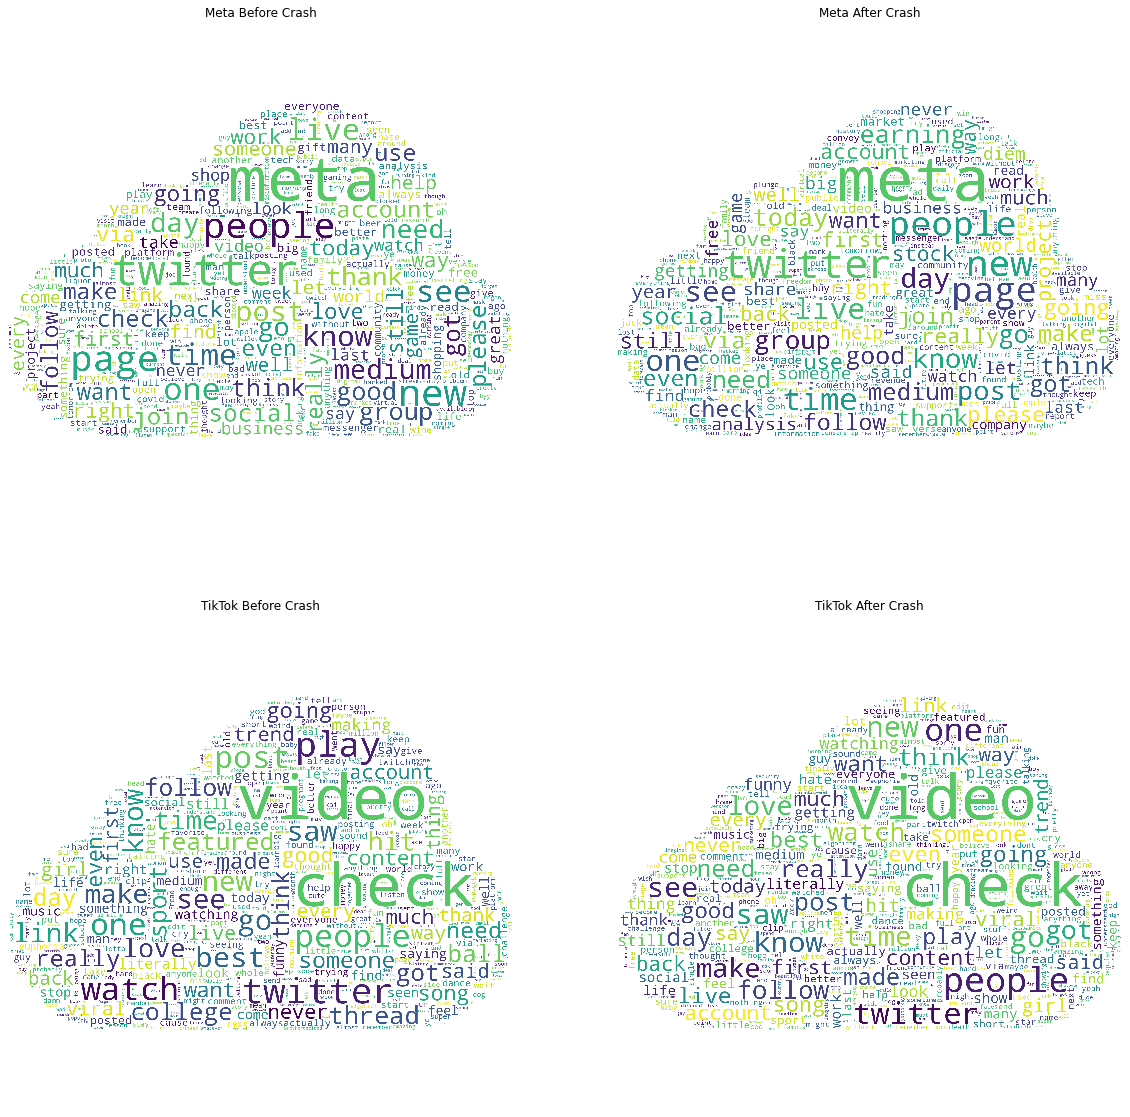

In [ ]:
# Plotting the wordcloud
plt.rcParams["figure.figsize"] = [4,3]
fig, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(meta_before_wc, interpolation="nearest", aspect='auto')
axarr[0, 0].set_title('Meta Before Crash')
axarr[0, 0].axis('off')
axarr[0, 1].imshow(meta_after_wc, interpolation='nearest', aspect='auto')
axarr[0, 1].set_title('Meta After Crash')
axarr[0, 1].axis('off')
axarr[1, 0].imshow(tk_before_wc, interpolation="nearest", aspect='auto')
axarr[1, 0].set_title('TikTok Before Crash')
axarr[1, 0].axis('off')
axarr[1, 1].imshow(tk_after_wc, interpolation='nearest', aspect='auto')
axarr[1, 1].set_title('TikTok After Crash')
axarr[1, 1].axis('off')
plt.axis('off')
fig = plt.gcf()

fig.set_size_inches(20, 20)

plt.show()

## Corpus Matrix

In [ ]:
# Define the corpus dataframe

corpus = [meta_before_lema, meta_after_lema, tk_before_lema, tk_after_lema]
corpus_index = ['meta_before', 'meta_after', 'tiktok_before', 'tiktok_after']

# Print the counts as a DataFrame
df_corpus = pd.DataFrame(data=corpus, columns=['corpus'], index=corpus_index)

df_corpus

,corpus
meta_before,first meta way casino day x figured second fin...
meta_after,meta apple cost 10b 2022 via brett limited 201...
tiktok_before,oh yeah well car look date go bad b hear check...
tiktok_after,retiring made emotional check video post best ...


In [ ]:
# Load and fit the vectorizer
cv = CountVectorizer(stop_words='english', strip_accents='ascii', max_features = 5000)
cv.fit(df_corpus['corpus'])

# Transform and store the results
corpus_results = cv.transform(df_corpus['corpus'])
print(corpus_results.shape)

(4, 5000)


In [ ]:
# Show the Matrix for a few words
features = cv.get_feature_names()
df_cor_res = pd.DataFrame(corpus_results.toarray(), columns=features, index=corpus_index)
df_cor_res

,00,000,00am,00pm,01,02,03,04,05,06,...,youth,yoy,yr,yummy,zero,zodiac,zombie,zone,zoo,zoom
meta_before,185,212,8,28,104,44,17,14,11,15,...,18,1,16,4,56,4,14,15,5,83
meta_after,219,272,16,52,36,190,33,21,26,8,...,48,57,23,3,92,5,12,18,2,99
tiktok_before,18,103,0,4,22,8,4,2,0,6,...,18,4,20,3,35,11,16,13,14,13
tiktok_after,20,165,1,8,14,38,4,4,2,5,...,21,1,30,13,21,7,13,13,8,28


## Cosine Similarities based on TF-IDF

In [ ]:
# Load and fit the tf-idf vectorizer
tf_idf_vec = TfidfVectorizer(stop_words='english', strip_accents='ascii')
docs_tfidf = tf_idf_vec.fit_transform(df_corpus['corpus'])

# Print the cosine similarities of the 4 documents
cossim = cosine_similarity(docs_tfidf, docs_tfidf)
df_cossim = pd.DataFrame(cossim, columns=df_corpus.index, index=df_corpus.index)
df_cossim

,meta_before,meta_after,tiktok_before,tiktok_after
meta_before,1.000000,0.977290,0.351616,0.324616
meta_after,0.977290,1.000000,0.301727,0.280805
tiktok_before,0.351616,0.301727,1.000000,0.988179
tiktok_after,0.324616,0.280805,0.988179,1.000000


We can see the cosine similarities of the 4 documents contining the tweets

# Sentiment Analysis


In [ ]:
# Defining a function that gets the sentiment according to 3 classes
def count_values_in_column(data,feature):
     total=data.loc[:,feature].value_counts(dropna=False)
     percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
     return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])

def getSent(df):
  df[['polarity', 'subjectivity']] = df['lemmatized'].apply(lambda Text: pd.Series(textblob.TextBlob(Text).sentiment))
  for index, row in df['lemmatized'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

  # Creating new dataframes for the 3 sentiments (positive, neutral, and negative)
  tw_list_negative = df[df["sentiment"]== "negative"]
  tw_list_positive = df[df["sentiment"]== "positive"]
  tw_list_neutral = df[df["sentiment"]== "neutral"]
  
  # Count_values for sentiment
  pc = count_values_in_column(df,"sentiment")

  # create data for Pie Chart
  pichart = count_values_in_column(df,"sentiment")
  names= pc.index
  size=pc["Percentage"]

  # Create a circle for the center of the plot
  my_circle=plt.Circle( (0,0), 0.7, color="white")
  plt.pie(size, labels=names, colors=['green','blue','red'])
  p=plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

  # Calculating tweet’s length and word count
  df['text_len'] = df['lemmatized'].astype(str).apply(len)
  df['text_word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

  return df, round(pd.DataFrame(df.groupby("sentiment").text_len.mean()),2), round(pd.DataFrame(df.groupby("sentiment").text_word_count.mean()),2)

## Meta - Before the crash

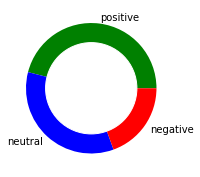

,date,content,cleaned,lemmatized,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,2022-01-31 23:59:59+00:00,@pistachioalt First they meta their way in the...,first they meta their way in the casino in the...,first meta way casino day x figured second fin...,-0.075000,0.211667,positive,0.226,0.544,0.229,0.0258,132,25
1,2022-01-31 23:59:59+00:00,Meta Shiba Token Review\nMeta Shiba started 20...,meta token review meta 2021 11 08 and it s cur...,meta token review meta 2021 11 08 currently ac...,-0.043810,0.681905,positive,0.198,0.530,0.272,0.2732,119,20
2,2022-01-31 23:59:49+00:00,@bethchase Funny story: I used that last name ...,funny story i used that last name on for,funny story used last name,0.125000,0.533333,positive,0.000,0.580,0.420,0.4404,26,5
3,2022-01-31 23:59:49+00:00,@META_Shiba The shib is great but what if we w...,the is great but what if we were more meta,great meta,0.800000,0.750000,positive,0.000,0.196,0.804,0.6249,10,2
4,2022-01-31 23:59:48+00:00,Zeekiedude streaming: Yu-Gi-Oh Master Duel Vir...,streaming oh master duel virtual world meta deck,streaming oh master duel virtual world meta deck,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,48,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39734,2022-01-31 00:00:01+00:00,We’ve just posted our daily schedule for Monda...,we just posted our daily schedule for the 31st...,posted daily schedule 31st wish peek check ple...,0.000000,0.000000,positive,0.000,0.615,0.385,0.6124,60,10
39735,2022-01-31 00:00:00+00:00,Did you know DSR is on all your favorite socia...,did you know is on all your favorite social media,know favorite social medium,0.266667,0.533333,positive,0.000,0.500,0.500,0.4588,27,4
39736,2022-01-31 00:00:00+00:00,"Diem, formerly Libra, is dead. But don't expec...",diem formerly libra is dead but don t expect m...,diem formerly libra dead expect meta formerly ...,-0.066667,0.133333,negative,0.381,0.619,0.000,-0.6486,50,8
39737,2022-01-31 00:00:00+00:00,VOTING NOW OPEN\n\nGo to our Facebook page htt...,voting now open go to our page,voting open go page,0.000000,0.500000,neutral,0.000,1.000,0.000,0.0000,19,4


In [ ]:
# Get the sentiments for tweets concerning Meta before the crash
getSent(meta_before)[0]

In [ ]:
# Count the sentiment distribution
count_values_in_column(meta_before,"sentiment")

,Total,Percentage
positive,18286,46.02
neutral,13726,34.54
negative,7727,19.44


## Meta - After the crash

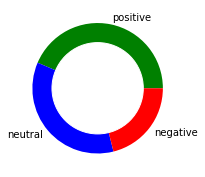

,date,content,cleaned,lemmatized,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,2022-02-02 23:59:59+00:00,Meta estimates Apple's iOS changes will cost i...,meta apple s will cost it 10b in 2022 by via,meta apple cost 10b 2022 via,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,28,6
1,2022-02-02 23:59:58+00:00,This George Brett Limited from 2019 just moved...,this brett limited from 2019 just for 300 only...,brett limited 2019 300 5 available everyone ge...,0.376190,0.430952,positive,0.094,0.495,0.411,0.7506,83,14
2,2022-02-02 23:59:57+00:00,@disclosetv my teens have never used facebook....,my teens have never used if the think it s dum...,teen never used think dumb day,-0.187500,0.250000,positive,0.000,0.649,0.351,0.4023,30,6
3,2022-02-02 23:59:57+00:00,@notallwitches buffing an infinite scaler in a...,buffing an infinite scaler in a scaling meta i...,buffing infinite scaler scaling meta cant breathe,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,49,7
4,2022-02-02 23:59:56+00:00,Are the days of meta running out? https://t.co...,are the days of meta running out,day meta running,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49451,2022-02-02 00:00:01+00:00,Enter to win the LNY #NFT of the day!\n\nIR Ti...,enter to win the of the day tiger 2 of 15 head...,enter win day tiger 2 15 head page chance win ...,0.766667,0.466667,positive,0.000,0.311,0.689,0.9382,55,12
49452,2022-02-02 00:00:00+00:00,@Hoe_Leopard i've recently gone back and rewat...,i recently gone back and like the first 3 of 3...,recently gone back like first 3 30 rock tough ...,-0.021065,0.352778,positive,0.121,0.696,0.183,0.3991,123,23
49453,2022-02-02 00:00:00+00:00,Live in an hour at 8PM EST!💪\n\nBreaking down ...,live in an hour at 8pm breaking down the massi...,live hour 8pm breaking massive s12 meta trying...,0.068182,0.750000,positive,0.000,0.750,0.250,0.4588,57,10
49454,2022-02-02 00:00:00+00:00,"“Mythmaking, of course, isn’t reporting. It’s ...",mythmaking of course t it s lazy story time fo...,mythmaking course lazy story time think postin...,-0.375000,1.000000,negative,0.326,0.506,0.169,-0.4215,79,12


In [ ]:
# Get the sentiments of tweets concerning Meta after the crash
getSent(meta_after_1)[0]

In [ ]:
# Count the sentiment distribution
count_values_in_column(meta_after_1,"sentiment")

,Total,Percentage
positive,21557,43.59
neutral,17468,35.32
negative,10431,21.09


## TikTok - Before Meta's crash

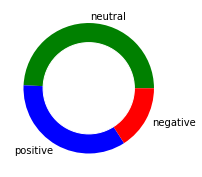

,date,content,cleaned,lemmatized,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,2022-01-31 23:59:58+00:00,oh yeah tesla well what about a car that just ...,oh yeah well what about a car that just into y...,oh yeah well car,0.000000,0.000000,positive,0.000,0.317,0.683,0.5106,16,4
1,2022-01-31 23:59:56+00:00,bro look at the date of the tiktok 😐 https://t...,look at the date of the,look date,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,9,2
2,2022-01-31 23:59:54+00:00,"I go on tiktok for the bad b*tches, not to hea...",i go on for the bad b not to hear all these i m,go bad b hear,-0.700000,0.666667,negative,0.538,0.462,0.000,-0.5423,13,4
3,2022-01-31 23:59:52+00:00,Check out Jack's video! #TikTok https://t.co/c...,check out jack s video,check jack video,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,16,3
4,2022-01-31 23:59:51+00:00,Just saw a Nigerian girl’s engagement photos o...,just saw a girl s engagement on and her man is...,saw girl engagement man stunning,0.500000,1.000000,positive,0.000,0.349,0.651,0.6808,32,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49663,2022-01-31 00:00:00+00:00,New mixtape time!\n\n@Kacirichter and @kellibr...,new time and talk about how music is used on p...,new time talk music used plus dog,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000,33,7
49664,2022-01-31 00:00:00+00:00,Did you know DSR is on all your favorite socia...,did you know is on all your favorite social media,know favorite social medium,0.266667,0.533333,positive,0.000,0.500,0.500,0.4588,27,4
49665,2022-01-31 00:00:00+00:00,"I didn't know her, yet I'm so sad for her and ...",i t know her yet i m so sad for her and her fa...,know yet sad family cheered miss joyful spirit...,-0.500000,1.000000,positive,0.253,0.269,0.478,0.6369,61,10
49666,2022-01-31 00:00:00+00:00,He cleans the house. She pays the bills. @brut...,he the house she the spoke to and maya about t...,house spoke maya story behind hilarious,0.050000,0.850000,positive,0.000,0.649,0.351,0.4019,39,6


In [ ]:
# Get the sentiments of tweets concerning TikTok before Meta's crash
getSent(tk_before)[0]

In [ ]:
# Count the sentiment distribution
count_values_in_column(tk_before,"sentiment")

,Total,Percentage
neutral,24470,49.27
positive,17301,34.83
negative,7897,15.90


## TikTok - After Meta's crash

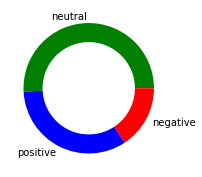

,date,content,cleaned,lemmatized,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,2022-02-02 23:59:58+00:00,gronks tiktok ab tom brady retiring made me em...,retiring made me emotional,retiring made emotional,0.000000,0.650000,positive,0.000,0.556,0.444,0.1531,23,3
1,2022-02-02 23:59:57+00:00,Check out Samuel Lopez's video! #TikTok https:...,check out s video,check video,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,11,2
2,2022-02-02 23:59:57+00:00,@haileybenson22 We 👀 you! Post your BEST play ...,we you post your best play on our so more coll...,post best play college watch ball play could f...,1.000000,0.300000,positive,0.000,0.550,0.450,0.8402,83,14
3,2022-02-02 23:59:57+00:00,@JessJessieyyy @esports The communities are di...,the are different and a and more powerful posi...,different powerful position u twitch people gi...,0.150000,0.800000,positive,0.000,0.606,0.394,0.6369,67,10
4,2022-02-02 23:59:54+00:00,OWEN POSTED A TIKTOK FINALLY… it’s ab that man...,posted a finally it s that man but still,posted finally man still,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49261,2022-02-02 00:00:04+00:00,@lyledal He is not on TikTok😂 Please ask him a...,he is not on please ask him about we are a wor...,please ask world right,0.285714,0.535714,positive,0.000,0.566,0.434,0.3182,22,4
49262,2022-02-02 00:00:03+00:00,"Honestly, in kayfabe, this is a genius troll\n...",honestly in this is a genius troll would obvio...,honestly genius troll would obviously buy caus...,0.075000,0.469444,negative,0.289,0.558,0.152,-0.4019,98,14
49263,2022-02-02 00:00:03+00:00,A viral TikTok video shows how a McDonald's Bi...,a viral video how a s big mac is made see the ...,viral video big mac made see best short luxury...,0.343750,0.362500,positive,0.000,0.506,0.494,0.8316,51,10
49264,2022-02-02 00:00:03+00:00,Check out Not C𝔞ⓢ𝕙𝓱♥🚀's video! #TikTok https:/...,check out not s video,check video,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,11,2


In [ ]:
# Get the sentiments of tweets concerning TikTok after Meta's crash
getSent(tk_after_1)[0]

In [ ]:
# Count the sentiment distribution
count_values_in_column(tk_after_1,"sentiment")

,Total,Percentage
neutral,25051,50.85
positive,16492,33.48
negative,7723,15.68


------------------------------